## Loading Training and Testing Dataset into Panda Dataframe

In [2]:
train_data = pd.read_csv("UNSW_NB15_training-set.csv", index_col='id')
test_data = pd.read_csv("UNSW_NB15_testing-set.csv", index_col='id')

In [4]:
train_data.sample(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
56770,0.000008,vines,-,INT,2,0,200,0,125000.000300,254,...,2,5,0,0,0,2,5,0,Exploits,1
68187,1.720034,tcp,-,FIN,102,20,127160,870,70.347446,254,...,1,1,0,0,0,2,1,0,Fuzzers,1
6289,0.004834,tcp,-,FIN,18,18,4136,2456,7240.380605,31,...,1,3,0,0,0,9,7,0,Normal,0
30105,0.007608,tcp,-,FIN,22,26,2054,2582,6177.707523,31,...,1,1,0,0,0,2,6,0,Normal,0
88698,0.000009,ip,-,INT,2,0,180,0,111111.107200,254,...,1,1,0,0,0,2,1,0,DoS,1


## Checking for Sample data from Training and Testing Dataset

In [5]:
test_data.sample(5)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
77555,0.000010,udp,-,INT,2,0,1064,0,100000.002500,254,...,1,35,0,0,0,10,35,0,Normal,0
69785,0.355723,tcp,-,CON,6,2,1012,86,19.678233,62,...,1,3,0,0,0,2,3,0,Normal,0
577,0.000003,rdp,-,INT,2,0,200,0,333333.321500,254,...,2,4,0,0,0,4,4,0,Exploits,1
20108,0.000003,udp,dns,INT,2,0,114,0,333333.321500,254,...,21,38,0,0,0,21,38,0,Generic,1
26060,0.516933,tcp,smtp,FIN,52,40,37496,3276,176.038279,31,...,1,1,0,0,0,3,2,0,Normal,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175341 entries, 1 to 175341
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 1 to 82332
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dur                82332 non-null  float64
 1   proto              82332 non-null  object 
 2   service            82332 non-null  object 
 3   state              82332 non-null  object 
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [8]:
print('Number of instances=%d'%(train_data.shape[0]))
print('Number of attributes=%d'%(train_data.shape[1]))
print('Number of instances=%d'%(test_data.shape[0]))
print('Number of attributes=%d'%(test_data.shape[1]))

Number of instances=175341
Number of attributes=44
Number of instances=82332
Number of attributes=44


In [9]:
print('Number of missing values:')
[(x, y) for x, y in zip(train_data.isna().sum(), train_data.isna().sum().index) if x > 0]


Number of missing values:


[]

In [10]:
print('Number of missing values:')
[(x, y) for x, y in zip(test_data.isna().sum(), test_data.isna().sum().index) if x > 0]

Number of missing values:


[]

In [11]:
train_data=train_data.replace('-',np.nan)
for column in train_data.columns:
    print('\t%s: %d'%(column,train_data[column].isnull().sum()))

	dur: 0
	proto: 0
	service: 94168
	state: 0
	spkts: 0
	dpkts: 0
	sbytes: 0
	dbytes: 0
	rate: 0
	sttl: 0
	dttl: 0
	sload: 0
	dload: 0
	sloss: 0
	dloss: 0
	sinpkt: 0
	dinpkt: 0
	sjit: 0
	djit: 0
	swin: 0
	stcpb: 0
	dtcpb: 0
	dwin: 0
	tcprtt: 0
	synack: 0
	ackdat: 0
	smean: 0
	dmean: 0
	trans_depth: 0
	response_body_len: 0
	ct_srv_src: 0
	ct_state_ttl: 0
	ct_dst_ltm: 0
	ct_src_dport_ltm: 0
	ct_dst_sport_ltm: 0
	ct_dst_src_ltm: 0
	is_ftp_login: 0
	ct_ftp_cmd: 0
	ct_flw_http_mthd: 0
	ct_src_ltm: 0
	ct_srv_dst: 0
	is_sm_ips_ports: 0
	attack_cat: 0
	label: 0


## Replacing null values with nan 
- ### Replacing the null values with NAN values as by doing analysis of training and testing dataset we found that services column contains major number of Null values which is not providing valuable information to the model.

In [12]:
test_data=test_data.replace('-',np.nan)
for column in test_data.columns:
    print('\t%s: %d'%(column,test_data[column].isnull().sum()))

	dur: 0
	proto: 0
	service: 47153
	state: 0
	spkts: 0
	dpkts: 0
	sbytes: 0
	dbytes: 0
	rate: 0
	sttl: 0
	dttl: 0
	sload: 0
	dload: 0
	sloss: 0
	dloss: 0
	sinpkt: 0
	dinpkt: 0
	sjit: 0
	djit: 0
	swin: 0
	stcpb: 0
	dtcpb: 0
	dwin: 0
	tcprtt: 0
	synack: 0
	ackdat: 0
	smean: 0
	dmean: 0
	trans_depth: 0
	response_body_len: 0
	ct_srv_src: 0
	ct_state_ttl: 0
	ct_dst_ltm: 0
	ct_src_dport_ltm: 0
	ct_dst_sport_ltm: 0
	ct_dst_src_ltm: 0
	is_ftp_login: 0
	ct_ftp_cmd: 0
	ct_flw_http_mthd: 0
	ct_src_ltm: 0
	ct_srv_dst: 0
	is_sm_ips_ports: 0
	attack_cat: 0
	label: 0


In [13]:
 #sort by dtype, we'll mostly treat the numerics the same though
discrete_vars=['dur','spkts','dpkts','sbytes','dbytes','rate','sttl','dttl','sload','dload','sloss'
              ,'dloss','sinpkt','dinpkt','sjit','djit','swin','stcpb','dtcpb','tcprtt',
               'synack','ackdat','smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl',
               'ct_dst_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd',
               'ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports']
categorical_vars=['proto','service','state','attack_cat']


In [14]:
for i in categorical_vars:
    print(train_data[i].value_counts())
    print()

tcp        79946
udp        63283
unas       12084
arp         2859
ospf        2595
           ...  
bbn-rcc       98
netblt        98
igmp          18
icmp          15
rtp            1
Name: proto, Length: 133, dtype: int64

dns         47294
http        18724
smtp         5058
ftp-data     3995
ftp          3428
ssh          1302
pop3         1105
dhcp           94
snmp           80
ssl            56
irc            25
radius         12
Name: service, dtype: int64

INT    82275
FIN    77825
CON    13152
REQ     1991
RST       83
ECO       12
no         1
PAR        1
URN        1
Name: state, dtype: int64

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64



- ### Finding out the frequency of occurence of Proto, Service, State and Attack_cat columns contains 

In [15]:
for i in categorical_vars:
    print(test_data[i].value_counts())
    print()

tcp        43095
udp        29418
unas        3515
arp          987
ospf         676
           ...  
ipip          32
pnni          32
pri-enc       32
ib            31
igmp          30
Name: proto, Length: 131, dtype: int64

dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: state, dtype: int64

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64



In [16]:
d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'ECO':'OTHER', 'REQ':'REQ', 'RST':'RST', 'PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER', 'ACC':'OTHER', 'CLO':'OTHER'}
train_data['state'] = train_data['state'].map(lambda s: d[s])

## Detecting Outlier in the Proto column
- ### Outliers deviate the mean of the model prediction and make model worse. After Performing value_counts() method we found large number of data is ‘tcp’, ‘udp’, ‘unas’ and ‘arp’. So, grouping the others value into one set and ‘tcp’, ‘udp’, ‘unas’ and ‘arp’ as individual will help to drop the unwanted rows.

In [17]:
repeated_occurances_proto=['tcp','udp','unas','arp']
def encoding_categoricals(column):
    if column in repeated_occurances_proto:
        return column
    else:
        return "other"

In [18]:
train_data['proto'] = train_data['proto'].apply(encoding_categoricals)
test_data['proto'] = test_data['proto'].apply(encoding_categoricals)

train_data = train_data[train_data['proto'] != 'other']
test_data = test_data[test_data['proto'] != "other"]

## One-Hot Encoding to the categorical features
- ### Applied One-hot encoding to the ‘State’ and ‘Proto’ features to convert the category into integer and it becomes easy to normalize afterwards.

In [19]:
one_hot = pd.get_dummies(train_data['state'])
train_data = train_data.drop('state', axis=1)
train_data = train_data.join(one_hot)

one_hot = pd.get_dummies(train_data['proto'])
train_data = train_data.drop('proto', axis=1)
train_data = train_data.join(one_hot)

In [20]:
d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}
test_data['state'] = test_data['state'].map(lambda s: d[s])

In [21]:
one_hot = pd.get_dummies(test_data['state'])
test_data = test_data.drop('state', axis=1)
test_data = test_data.join(one_hot)

one_hot = pd.get_dummies(test_data['proto'])
test_data = test_data.drop('proto', axis=1)
test_data = test_data.join(one_hot)

In [22]:
test_data

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,CON,FIN,INT,OTHER,REQ,RST,arp,tcp,udp,unas
id,,,,,,,,,,,,,,,,,,,,,
1,0.000011,NaN,2,0,496,0,90909.090200,254,0,1.803636e+08,...,0,0,1,0,0,0,0,0,1,0
2,0.000008,NaN,2,0,1762,0,125000.000300,254,0,8.810000e+08,...,0,0,1,0,0,0,0,0,1,0
3,0.000005,NaN,2,0,1068,0,200000.005100,254,0,8.544000e+08,...,0,0,1,0,0,0,0,0,1,0
4,0.000006,NaN,2,0,900,0,166666.660800,254,0,6.000000e+08,...,0,0,1,0,0,0,0,0,1,0
5,0.000010,NaN,2,0,2126,0,100000.002500,254,0,8.504000e+08,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82328,0.000005,NaN,2,0,104,0,200000.005100,254,0,8.320000e+07,...,0,0,1,0,0,0,0,0,1,0
82329,1.106101,NaN,20,8,18062,354,24.410067,254,252,1.241044e+05,...,0,1,0,0,0,0,0,1,0,0
82330,0.000000,NaN,1,0,46,0,0.000000,0,0,0.000000e+00,...,0,0,1,0,0,0,1,0,0,0


In [23]:
train_data

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,label,CON,FIN,INT,REQ,RST,arp,tcp,udp,unas
id,,,,,,,,,,,,,,,,,,,,,
1,0.121478,NaN,6,4,258,172,74.087490,252,254,1.415894e+04,...,0,0,1,0,0,0,0,1,0,0
2,0.649902,NaN,14,38,734,42014,78.473372,62,252,8.395112e+03,...,0,0,1,0,0,0,0,1,0,0
3,1.623129,NaN,8,16,364,13186,14.170161,62,252,1.572272e+03,...,0,0,1,0,0,0,0,1,0,0
4,1.681642,ftp,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,1,0,0,0,0,1,0,0
5,0.449454,NaN,10,6,534,268,33.373826,254,252,8.561499e+03,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175337,0.000009,dns,2,0,114,0,111111.107200,254,0,5.066666e+07,...,1,0,0,1,0,0,0,0,1,0
175338,0.505762,NaN,10,8,620,354,33.612649,254,252,8.826286e+03,...,1,0,1,0,0,0,0,1,0,0
175339,0.000009,dns,2,0,114,0,111111.107200,254,0,5.066666e+07,...,1,0,0,1,0,0,0,0,1,0


## Plot Correlation matrix using Heatmap
- #### Plotted Correlated heatmap helps to understand the correlation between the features.
- #### After multiple trial and error we found 0.9 limit for correlation matrix between feature provides the important features for training model.

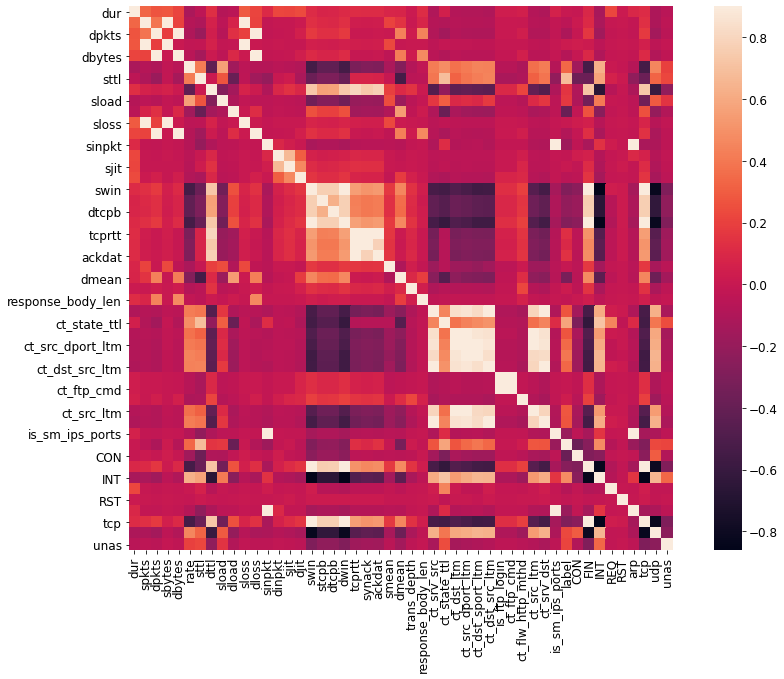

In [24]:
corr_matrix = train_data.corr(method='pearson') #  ‘pearson’, ‘kendall’, ‘spearman’
fig = plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,vmax=0.9,square = True) 

In [25]:
train_data.head()

,dur,service,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,label,CON,FIN,INT,REQ,RST,arp,tcp,udp,unas
id,,,,,,,,,,,,,,,,,,,,,
1,0.121478,NaN,6,4,258,172,74.087490,252,254,14158.942380,...,0,0,1,0,0,0,0,1,0,0
2,0.649902,NaN,14,38,734,42014,78.473372,62,252,8395.112305,...,0,0,1,0,0,0,0,1,0,0
3,1.623129,NaN,8,16,364,13186,14.170161,62,252,1572.271851,...,0,0,1,0,0,0,0,1,0,0
4,1.681642,ftp,12,12,628,770,13.677108,62,252,2740.178955,...,0,0,1,0,0,0,0,1,0,0
5,0.449454,NaN,10,6,534,268,33.373826,254,252,8561.499023,...,0,0,1,0,0,0,0,1,0,0


In [26]:
columns = corr_matrix.columns
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
         if corr_matrix.iloc[i,j] >= 0.9:
                print(f"{columns[i]} - {columns[j]} - {corr_matrix.iloc[i,j]}")

spkts - sbytes - 0.9645266219805146
spkts - sloss - 0.9730150202299451
dpkts - dbytes - 0.9720996368155072
dpkts - dloss - 0.9786780110101772
sbytes - sloss - 0.9968700979978583
dbytes - dloss - 0.9965409206459557
sinpkt - is_sm_ips_ports - 0.9418877444513564
sinpkt - arp - 0.9402539899820334
swin - dwin - 0.9891691863561344
swin - FIN - 0.973633450568143
swin - tcp - 0.9999463738070375
dwin - FIN - 0.9841791458701907
dwin - tcp - 0.9891763826530474
tcprtt - synack - 0.9481184388796426
tcprtt - ackdat - 0.9400717078604143
ct_srv_src - ct_dst_src_ltm - 0.9691867543813244
ct_srv_src - ct_srv_dst - 0.9797973923717352
ct_dst_ltm - ct_src_dport_ltm - 0.9628078543673091
ct_dst_ltm - ct_src_ltm - 0.9014258797847882
ct_src_dport_ltm - ct_dst_sport_ltm - 0.9052729256107189
ct_src_dport_ltm - ct_src_ltm - 0.9131553125868282
ct_dst_src_ltm - ct_srv_dst - 0.9743131492782294
is_ftp_login - ct_ftp_cmd - 1.0
is_sm_ips_ports - arp - 0.9818582603170386
FIN - tcp - 0.973535794396259


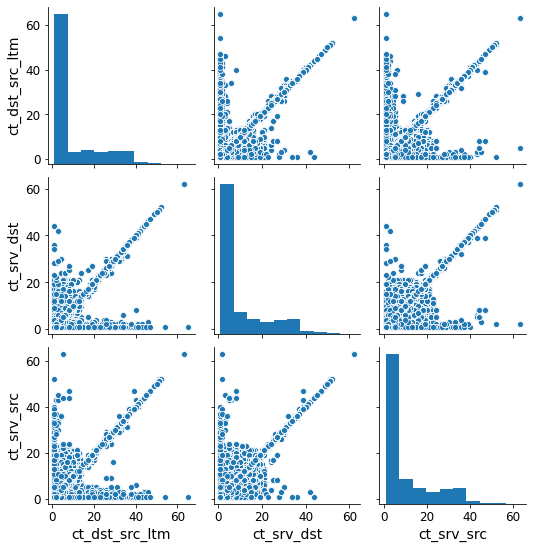

In [27]:
sns.pairplot(train_data[['ct_dst_src_ltm', 'ct_srv_dst','ct_srv_src']])
plt.show()

## Dropping the column which is not highly correlated.

In [28]:
train_data.drop(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports', 'tcp', 'CON', 'FIN', 'REQ','service','attack_cat'],axis = 1, inplace = True)
 

In [29]:
train_data.shape[1]

22

In [30]:
test_data.drop(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'stcpb', 'dtcpb', 'dwin', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'is_sm_ips_ports', 'tcp', 'CON', 'FIN', 'REQ','OTHER','service','attack_cat'],axis = 1, inplace = True)

In [31]:
test_data.shape[1]

22

#### Most correlated features are :

#### spkts, sbytes, sloss, dpkts, dbytes, dloss ,sinpkt, is_sm_ips_ports, swin, dwin, tcprtt, synack, ct_srv_src, ct_srv_dst, ct_dst_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, is_ftp_login ct_ftp_cmd

In [32]:
from collections.abc import Sequence
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shutil
import os


# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)



# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [33]:
target = 'label'
features = list(train_data.columns)
features = [f for f in features if f!=target]

## Split the data into X and Y

In [34]:
x_train=train_data[features]
y_train=train_data[[target]]


target = 'label'
features = list(train_data.columns)
features = [f for f in features if f!=target]

x_test=test_data[features]
y_test=test_data[[target]]

In [35]:
x_train.shape

(158172, 21)

In [36]:
y_train.shape

(158172, 1)

In [37]:
print(x_train.shape, y_train.shape)

(158172, 21) (158172, 1)


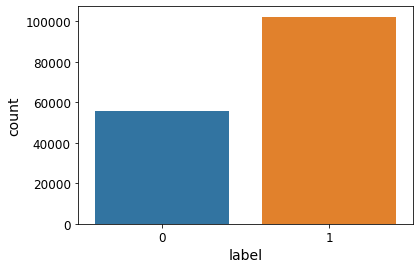

In [38]:
#sns.set_theme(style="whitegrid")

sns.countplot(y_train[target])
plt.show()
#y_train[target].value_counts().plot(kind = 'bar')
#sns.boxplot(x="Class", y="V6", data=equal_sample,  ax=axes[1,3])

In [39]:
print(x_test.shape,y_test.shape)

(77015, 21) (77015, 1)


In [40]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

## Performed feature normalization using z-score

In [41]:
for col in x_train.columns:
        encode_numeric_zscore(x_train,col)

for col in x_test.columns:
        encode_numeric_zscore(x_test,col)

In [42]:
label0 = y_train[y_train['label'] == 0].index.values
label1 = y_train[y_train['label'] == 1].index.values

min_rows = min(y_train['label'].value_counts())

np.random.shuffle(label0)
np.random.shuffle(label1)

index_shuffled_label0  = list(label0)
index_shuffled_label1  = list(label1)

indices_ = index_shuffled_label0[:min_rows] + index_shuffled_label1[:min_rows]


In [43]:
x_train.shape

(158172, 21)

In [44]:
x_train = x_train.loc[indices_, :]
y_train= y_train.loc[indices_,:]

In [45]:
print(x_train.shape, y_train.shape)

(111804, 21) (111804, 1)


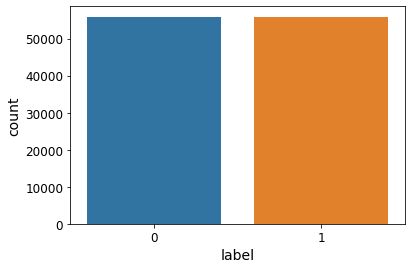

In [46]:
sns.countplot(y_train[target])
plt.show()
#y_train['label'].value_counts().plot(kind = 'bar')

In [47]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Logistic Regression

In [49]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
log_clf = LogisticRegression()

# fit the model with data
log_clf.fit(x_train, y_train)

# predict the response for new observations
y_pred = log_clf.predict(x_test)

[[20582 16350]
 [ 1076 39007]]
Plotting confusion matrix


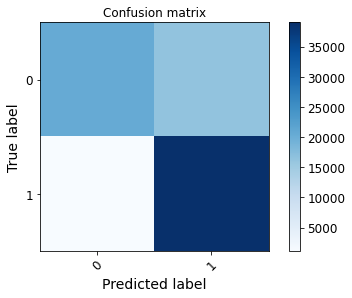

In [50]:
 from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import roc_curve, auc

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [51]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [52]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.56      0.70     36932
           1       0.70      0.97      0.82     40083

    accuracy                           0.77     77015
   macro avg       0.83      0.77      0.76     77015
weighted avg       0.82      0.77      0.76     77015



In [53]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
y_score=cross_val_predict(log_clf , x_train, y_train, cv=3)

In [54]:
print("Precision : {}".format(precision_score(y_test, y_pred)))

Precision : 0.7046443990823202


In [55]:
print("Recall : {}".format(recall_score(y_test, y_pred)))


Recall : 0.9731557019185191


In [56]:
if y_score.ndim == 3:
    y_score = y_score[:, 1]

In [57]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_score)


In [58]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])




def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)





Saving figure precision_vs_recall_plot


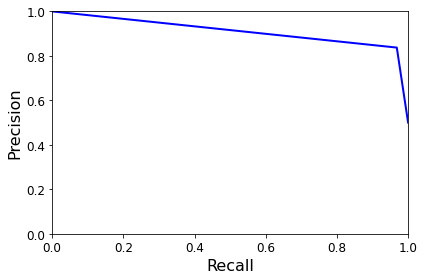

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [59]:
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()
plt.figure(figsize=(8, 6))

In [60]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_score)

Saving figure roc_curve_plot


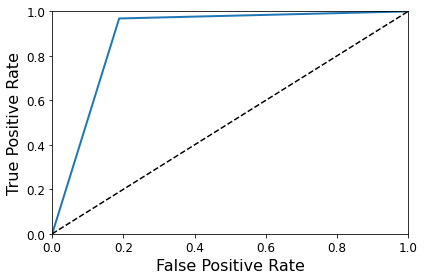

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [61]:
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()
plt.figure(figsize=(8, 6))

In [62]:
from sklearn.metrics import roc_auc_score

print("roc_score : {}".format(roc_auc_score(y_train, y_score)))

roc_score : 0.8900576008014025


In [63]:
from sklearn import svm

#create svm classifier
svm_clf = svm.SVC(kernel = 'rbf', gamma = 5.0,random_state=13,max_iter=1000)
svm_clf.fit(x_train,y_train)




SVC(gamma=5.0, max_iter=1000, random_state=13)

In [64]:
y_pred=svm_clf.predict(x_test)

In [65]:
score = metrics.accuracy_score(y_test, y_pred)

print("Accuracy score: {}".format(score))

Accuracy score: 0.5303382457962734


In [66]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.5317048141962091
Recall score: 0.5303382457962734
F1 score: 0.4621168194355778


In [67]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.16      0.25     36932
           1       0.53      0.87      0.66     40083

    accuracy                           0.53     77015
   macro avg       0.53      0.52      0.45     77015
weighted avg       0.53      0.53      0.46     77015



[[ 6003 30929]
 [ 5242 34841]]
Plotting confusion matrix


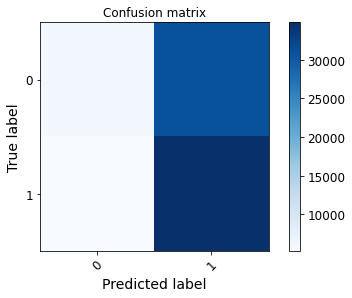

In [68]:
# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [69]:
from sklearn.metrics import precision_recall_curve

y_score=cross_val_predict(svm_clf , x_train, y_train, cv=3)
#precisions, recalls, thresholds = precision_recall_curve(y_train, score)


In [70]:
if y_score.ndim == 3:
    y_score = y_score[:, 1]

In [71]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_score)

In [72]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_score)

Saving figure roc_curve_plot


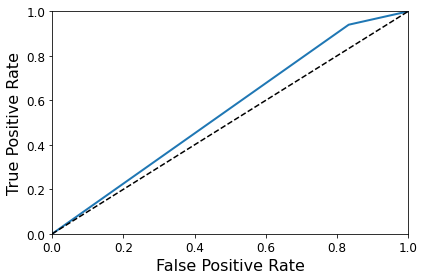

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [73]:
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()
plt.figure(figsize=(8, 6))

In [74]:
from sklearn.metrics import roc_auc_score

print("roc_score : {}".format(roc_auc_score(y_train, y_score)))

roc_score : 0.5535401237880577


In [75]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (using the value K=10)
knn_clf = KNeighborsClassifier()

# fit the model with data
knn_clf.fit(x_train, y_train)

# predict the response for new observations
y_pred = knn_clf.predict(x_test)

print(y_pred)

[1 1 1 ... 0 0 1]


In [76]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.836673511013421
Recall score: 0.8297993897292735
F1 score: 0.8282561138087351


In [77]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81     36932
           1       0.79      0.91      0.85     40083

    accuracy                           0.83     77015
   macro avg       0.84      0.83      0.83     77015
weighted avg       0.84      0.83      0.83     77015



[[27440  9492]
 [ 3616 36467]]
Plotting confusion matrix


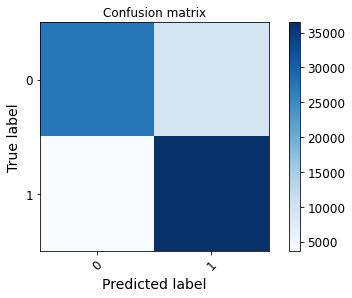

In [78]:
# Compute confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [79]:
from sklearn.metrics import precision_recall_curve

y_score=cross_val_predict(knn_clf , x_train, y_train, cv=3)
print(y_score)

[0 0 1 ... 1 1 1]


In [80]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_score)

Saving figure roc_curve_plot


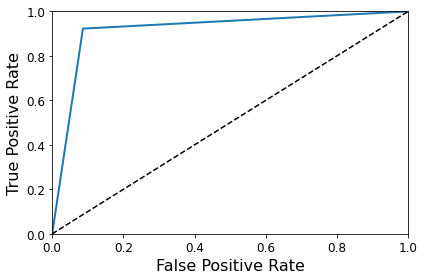

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [81]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_score)

plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()
plt.figure(figsize=(8, 6))

In [82]:
from sklearn.metrics import roc_auc_score

print("roc_score : {}".format(roc_auc_score(y_train, y_score)))

roc_score : 0.918142463597009


In [83]:
y_train_nn = pd.get_dummies(y_train['label'])
y_test = test_data.loc[:, ['label']]

In [84]:
y_test_nn = pd.get_dummies(y_test['label'])

In [85]:
print(x_train.shape, y_train_nn.shape)
print(x_test.shape,y_test_nn.shape)

(111804, 21) (111804, 2)
(77015, 21) (77015, 2)


## Fully-Connected Neural Network
### 1) Neural Network with Relu as Activation function and Adam as Optimizer

In [86]:
import io, requests, os, h5py, shutill
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto') 

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=50)  

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/50

Epoch 00001: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
3494/3494 - 3s - loss: 0.1867 - accuracy: 0.9078 - val_loss: 0.3753 - val_accuracy: 0.8199
Epoch 2/50

Epoch 00002: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
3494/3494 - 3s - loss: 0.1604 - accuracy: 0.9180 - val_loss: 0.3371 - val_accuracy: 0.8134
Epoch 3/50

Epoch 00003: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
3494/3494 - 3s - loss: 0.1573 - accuracy: 0.9196 - val_loss: 0.3025 - val_accuracy: 0.8441
Epoch 4/50

Epoch 00004: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
3494/3494 - 3s - loss: 0.1558 - accuracy: 0.9204 - val_loss: 0.3177 - val_accuracy: 0.8195
Epoch 5/50

Epoch 00005: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight.hdf5
3494/3494 - 3s - loss: 0.1539 - accuracy: 0.9210 - val_loss: 0.3449 - val_accuracy: 0.8249
Epoch 6/50

Epoch 00006: saving model to /Users/moksh/CSUS/CSC215/Project_1

In [87]:
y_pred = model.predict(x_test)
print(y_pred)

[[1.3689336e-01 8.6310667e-01]
 [3.0876315e-01 6.9123679e-01]
 [3.8502985e-01 6.1497015e-01]
 ...
 [1.0000000e+00 1.3074422e-10]
 [1.0000000e+00 1.3074422e-10]
 [2.0067064e-01 7.9932934e-01]]


In [88]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)


[1 1 1 ... 0 0 1]


In [89]:
y_test_nn

,0,1
id,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
82328,1,0
82329,1,0
82330,1,0


In [90]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.8542065686641847
Recall score: 0.8432383301954165
F1 score: 0.8412909207646158


In [91]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82     36932
           1       0.80      0.94      0.86     40083

    accuracy                           0.84     77015
   macro avg       0.86      0.84      0.84     77015
weighted avg       0.85      0.84      0.84     77015



[[27357  9575]
 [ 2498 37585]]
Plotting confusion matrix


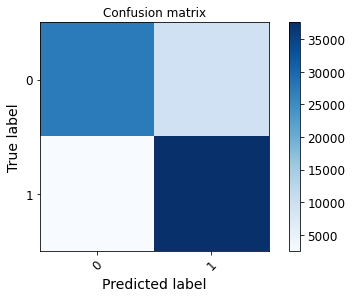

In [92]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [93]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

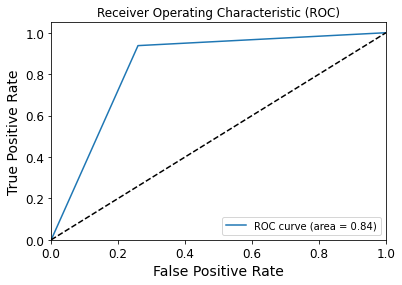

In [94]:
plot_roc(y_pred, y_test)

### 2) Neural Network with Sigmoid as Activation function and sgd as Optimizer

In [95]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='sigmoid'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto') 

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=50)  

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/50

Epoch 00001: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
3494/3494 - 2s - loss: 0.4419 - accuracy: 0.8317 - val_loss: 0.4326 - val_accuracy: 0.7430
Epoch 2/50

Epoch 00002: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
3494/3494 - 2s - loss: 0.2316 - accuracy: 0.8924 - val_loss: 0.3484 - val_accuracy: 0.8074
Epoch 3/50

Epoch 00003: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
3494/3494 - 2s - loss: 0.1948 - accuracy: 0.9054 - val_loss: 0.3372 - val_accuracy: 0.8175
Epoch 4/50

Epoch 00004: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
3494/3494 - 2s - loss: 0.1827 - accuracy: 0.9100 - val_loss: 0.3470 - val_accuracy: 0.8163
Epoch 5/50

Epoch 00005: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight2.hdf5
3494/3494 - 2s - loss: 0.1755 - accuracy: 0.9138 - val_loss: 0.3427 - val_accuracy: 0.8200
Epoch 6/50

Epoch 00006: saving model to /Users/moksh/CSUS/CSC215/Proj

In [96]:
y_pred = model.predict(x_test)
print(y_pred)

[[1.01921163e-01 8.98078859e-01]
 [2.15316340e-01 7.84683645e-01]
 [2.63985366e-01 7.36014605e-01]
 ...
 [9.99884725e-01 1.15226365e-04]
 [9.99884725e-01 1.15226365e-04]
 [3.02287601e-02 9.69771266e-01]]


In [97]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)

[1 1 1 ... 0 0 1]


In [98]:
y_test_nn

,0,1
id,,
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
...,...,...
82328,1,0
82329,1,0
82330,1,0


In [99]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))

Precision score: 0.8614165309703382
Recall score: 0.8505226254625722
F1 score: 0.8487162572635565


In [100]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83     36932
           1       0.80      0.94      0.87     40083

    accuracy                           0.85     77015
   macro avg       0.86      0.85      0.85     77015
weighted avg       0.86      0.85      0.85     77015



[[27694  9238]
 [ 2274 37809]]
Plotting confusion matrix


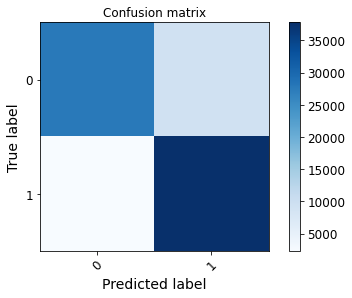

In [101]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [102]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

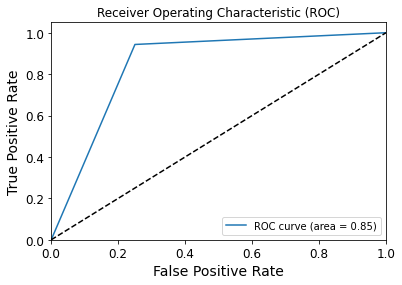

In [103]:
plot_roc(y_pred, y_test)

### 3) Neural Network with tanh as Activation function and sgd as Optimizer

In [104]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto') 

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=10)  

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)


Epoch 1/10

Epoch 00001: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
3494/3494 - 2s - loss: 0.2130 - accuracy: 0.8978 - val_loss: 0.3846 - val_accuracy: 0.8101
Epoch 2/10

Epoch 00002: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
3494/3494 - 2s - loss: 0.1721 - accuracy: 0.9148 - val_loss: 0.3269 - val_accuracy: 0.8355
Epoch 3/10

Epoch 00003: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
3494/3494 - 2s - loss: 0.1656 - accuracy: 0.9171 - val_loss: 0.3683 - val_accuracy: 0.8190
Epoch 4/10

Epoch 00004: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
3494/3494 - 2s - loss: 0.1626 - accuracy: 0.9187 - val_loss: 0.3565 - val_accuracy: 0.8200
Epoch 5/10

Epoch 00005: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight3.hdf5
3494/3494 - 2s - loss: 0.1606 - accuracy: 0.9194 - val_loss: 0.3645 - val_accuracy: 0.8178
Epoch 6/10

Epoch 00006: saving model to /Users/moksh/CSUS/CSC215/Proj

In [105]:
y_pred = model.predict(x_test)
print(y_pred)

[[3.2780819e-02 9.6721917e-01]
 [2.0851837e-01 7.9148161e-01]
 [2.5498101e-01 7.4501896e-01]
 ...
 [9.9941266e-01 5.8732124e-04]
 [9.9941266e-01 5.8732124e-04]
 [9.2669716e-03 9.9073303e-01]]


In [106]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)

[1 1 1 ... 0 0 1]


In [107]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))


Precision score: 0.8530075002876665
Recall score: 0.8246705187301175
F1 score: 0.8197733832728928


In [108]:
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.67      0.78     36932
           1       0.76      0.97      0.85     40083

    accuracy                           0.82     77015
   macro avg       0.86      0.82      0.82     77015
weighted avg       0.85      0.82      0.82     77015



In [109]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

[[24596 12336]
 [ 1167 38916]]
Plotting confusion matrix


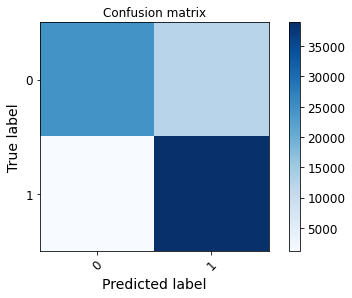

In [110]:
plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [111]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

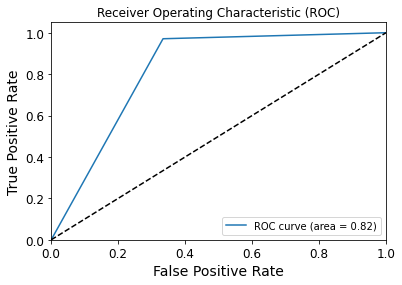

In [112]:
plot_roc(y_pred, y_test)

### 4) Neural Network with tanh as Activation function and Adam as Optimizer

In [113]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(32, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(y_train_nn.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto') 

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train_nn, validation_data=(x_test,y_test_nn), callbacks=[monitor, model_checkpoint], verbose=2, epochs=10)  

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)


Epoch 1/10

Epoch 00001: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
3494/3494 - 3s - loss: 0.1811 - accuracy: 0.9107 - val_loss: 0.3188 - val_accuracy: 0.8379
Epoch 2/10

Epoch 00002: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
3494/3494 - 3s - loss: 0.1605 - accuracy: 0.9186 - val_loss: 0.3319 - val_accuracy: 0.8381
Epoch 3/10

Epoch 00003: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
3494/3494 - 3s - loss: 0.1578 - accuracy: 0.9205 - val_loss: 0.3275 - val_accuracy: 0.8349
Epoch 4/10

Epoch 00004: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
3494/3494 - 3s - loss: 0.1555 - accuracy: 0.9210 - val_loss: 0.3423 - val_accuracy: 0.8241
Epoch 5/10

Epoch 00005: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight4.hdf5
3494/3494 - 3s - loss: 0.1539 - accuracy: 0.9215 - val_loss: 0.3162 - val_accuracy: 0.8387
Epoch 6/10

Epoch 00006: saving model to /Users/moksh/CSUS/CSC215/Proj

In [114]:
y_pred = model.predict(x_test)
print(y_pred)

[[8.1938185e-02 9.1806179e-01]
 [2.9675838e-01 7.0324165e-01]
 [3.7056971e-01 6.2943029e-01]
 ...
 [9.9990189e-01 9.8086683e-05]
 [9.9990189e-01 9.8086683e-05]
 [9.2416793e-02 9.0758318e-01]]


In [115]:
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)


[1 1 1 ... 0 0 1]


In [116]:
precision_score = metrics.precision_score(y_test, y_pred, average= "weighted")
print("Precision score: {}".format(precision_score))
recall_score = metrics.recall_score(y_test, y_pred, average= "weighted")
print("Recall score: {}".format(recall_score))
f1_score = metrics.f1_score(y_test, y_pred, average= "weighted")
print("F1 score: {}".format(f1_score))


Precision score: 0.8636767821680326
Recall score: 0.8551840550542102
F1 score: 0.8537617492252075


In [117]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84     36932
           1       0.81      0.94      0.87     40083

    accuracy                           0.86     77015
   macro avg       0.87      0.85      0.85     77015
weighted avg       0.86      0.86      0.85     77015



In [118]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

[[28274  8658]
 [ 2495 37588]]
Plotting confusion matrix


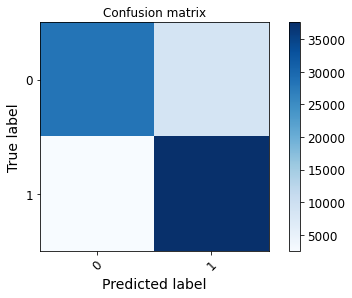

In [119]:
plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

In [120]:
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()


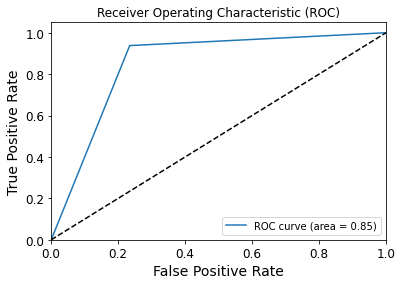

In [121]:
plot_roc(y_pred, y_test)

## Additional Features

In [122]:
import pandas as pd
train_data = pd.read_csv("UNSW_NB15_training-set.csv", index_col='id')
test_data = pd.read_csv("UNSW_NB15_testing-set.csv", index_col='id')

In [123]:
#sort by dtype, we'll mostly treat the numerics the same though

discrete_vars=['dur','spkts','dpkts','sbytes','dbytes','sttl','dttl','sloss','dloss','swin',
               'smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl',
               'ct_dst_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd',
               'ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports']
continuous_vars=['rate','sload','dload','sinpkt','dinpkt', 'sjit','djit','synack','ackdat']
categorical_vars=['proto','state','attack_cat''stcpb','dtcpb', 'tcprtt']
dep_var=['label']


In [124]:
train_data.loc[:, dep_var + discrete_vars + continuous_vars].describe()

,label,dur,spkts,dpkts,sbytes,dbytes,sttl,dttl,sloss,dloss,...,is_sm_ips_ports,rate,sload,dload,sinpkt,dinpkt,sjit,djit,synack,ackdat
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,...,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000
mean,0.680622,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,179.546997,79.609567,4.953000,6.948010,...,0.015752,9.540619e+04,7.345403e+07,6.712056e+05,985.976864,88.216296,4.976254e+03,604.353826,0.021020,0.020375
std,0.466237,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,102.940011,110.506863,66.005059,52.732999,...,0.124516,1.654010e+05,1.883574e+08,2.421312e+06,7242.245841,987.093195,4.496585e+04,4061.043281,0.043400,0.040506
min,0.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,62.000000,0.000000,0.000000,0.000000,...,0.000000,3.278614e+01,1.305334e+04,0.000000e+00,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,1.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,254.000000,29.000000,0.000000,0.000000,...,0.000000,3.225807e+03,8.796748e+05,1.447023e+03,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000
75%,1.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,254.000000,252.000000,3.000000,2.000000,...,0.000000,1.250000e+05,8.888889e+07,2.784487e+04,55.156896,51.053000,2.513295e+03,114.990625,0.023268,0.038906
max,1.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,255.000000,254.000000,4803.000000,5484.000000,...,1.000000,1.000000e+06,5.988000e+09,2.242273e+07,84371.496000,56716.824000,1.460480e+06,289388.269700,2.100352,1.520884


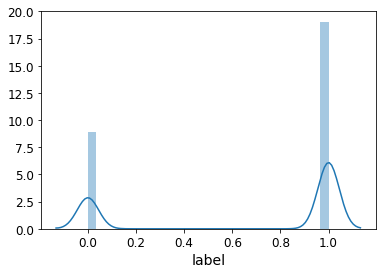

In [125]:
sns.distplot(train_data['label'])

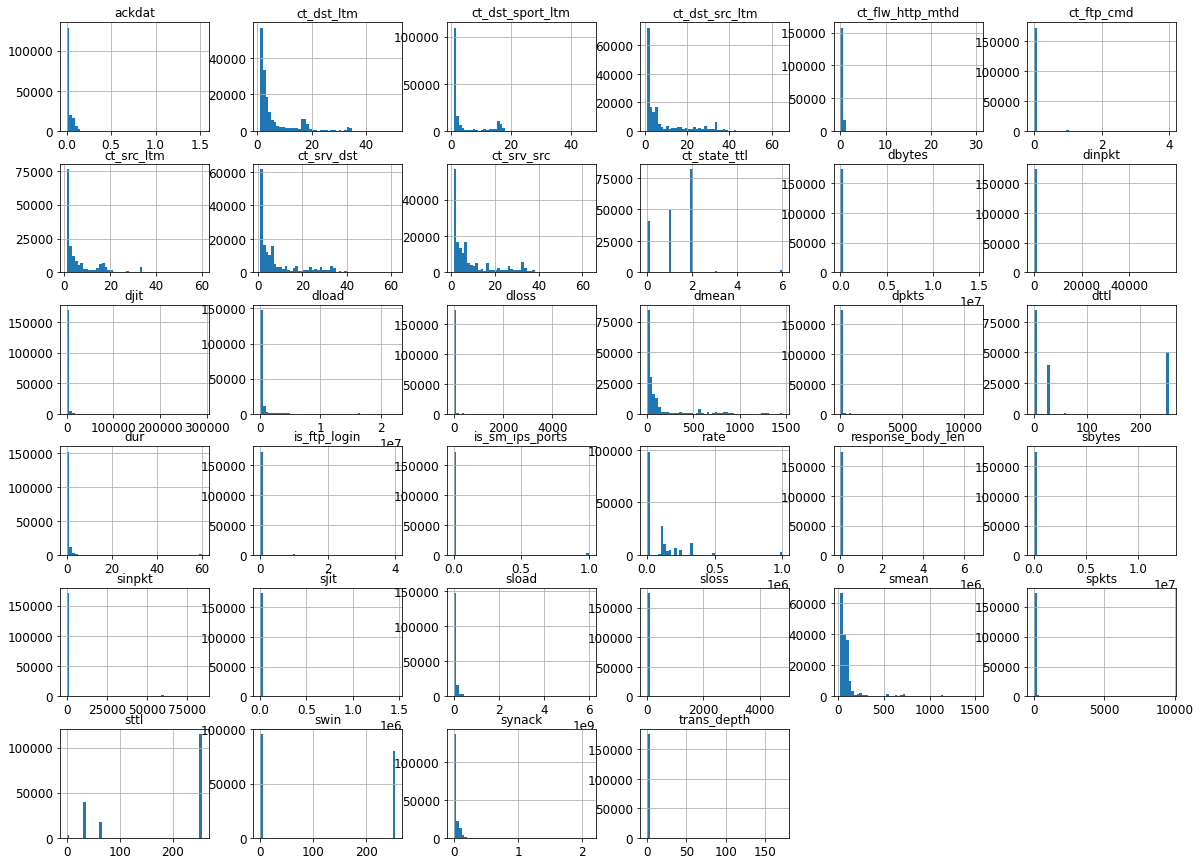

In [126]:
train_data.loc[:, discrete_vars + continuous_vars].hist(bins=50, figsize=(20,15))
plt.show()

In [127]:
d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'ECO':'OTHER', 'REQ':'REQ', 'RST':'RST', 'PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER', 'ACC':'OTHER', 'CLO':'OTHER'}
train_data['state'] = train_data['state'].map(lambda s: d[s])

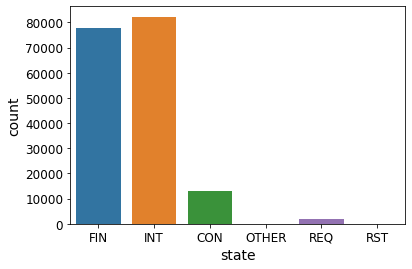

In [128]:
sns.countplot(train_data['state'])
plt.show()

In [129]:
most_occured = ['tcp', 'udp', 'unas']
def encoding_categoricals(column):
    if column in most_occured:
        return column
    else:
        return "other"

In [130]:
train_data['proto'] = train_data['proto'].apply(encoding_categoricals)

test_data['proto'] = test_data['proto'].apply(encoding_categoricals)

In [131]:
d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}
test_data['state'] = test_data['state'].map(lambda s: d[s])

In [132]:
most_occured = ['INT', 'FIN', 'CON', 'REQ']

train_data = train_data[train_data['state'].isin(most_occured)]

test_data = test_data[test_data['state'].isin(most_occured)]

In [133]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [134]:
encode_text_dummy(train_data,"proto")  
encode_text_dummy(train_data,"state")

encode_text_dummy(test_data,"proto")  
encode_text_dummy(test_data,"state")

In [135]:
train_data.drop(['swin','service','label', 'spkts', 'dinpkt', 'sjit', 'djit', 'response_body_len'],axis = 1, inplace = True)

In [136]:
test_data.drop(['swin','service','label', 'spkts', 'dinpkt', 'sjit', 'djit', 'response_body_len'],axis = 1, inplace = True)

In [137]:
test_data.shape[1]

42

In [138]:
train_data.shape[1]

42

In [139]:
print('Number of missing values:')
[(x, y) for x, y in zip(test_data.isna().sum(), test_data.isna().sum().index) if x > 0]

Number of missing values:


[]

In [140]:
train_data=train_data.replace('-',np.nan)
for column in train_data.columns:
    print('\t%s: %d'%(column,train_data[column].isnull().sum()))

	dur: 0
	dpkts: 0
	sbytes: 0
	dbytes: 0
	rate: 0
	sttl: 0
	dttl: 0
	sload: 0
	dload: 0
	sloss: 0
	dloss: 0
	sinpkt: 0
	stcpb: 0
	dtcpb: 0
	dwin: 0
	tcprtt: 0
	synack: 0
	ackdat: 0
	smean: 0
	dmean: 0
	trans_depth: 0
	ct_srv_src: 0
	ct_state_ttl: 0
	ct_dst_ltm: 0
	ct_src_dport_ltm: 0
	ct_dst_sport_ltm: 0
	ct_dst_src_ltm: 0
	is_ftp_login: 0
	ct_ftp_cmd: 0
	ct_flw_http_mthd: 0
	ct_src_ltm: 0
	ct_srv_dst: 0
	is_sm_ips_ports: 0
	attack_cat: 0
	proto-other: 0
	proto-tcp: 0
	proto-udp: 0
	proto-unas: 0
	state-CON: 0
	state-FIN: 0
	state-INT: 0
	state-REQ: 0


In [141]:
from sklearn import preprocessing
def encode_text_index(df, name):
    le = preprocessing.LabelEncoder()
    df[name] = le.fit_transform(df[name])
    return le.classes_

def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [142]:
encode_text_index(train_data,"attack_cat")
encode_text_index(test_data,"attack_cat")

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [143]:
x_train = train_data.drop(['attack_cat'], axis = 1)
y_train = train_data.loc[:, ['attack_cat']]

x_test = test_data.drop(['attack_cat'], axis = 1)
y_test = test_data.loc[:, ['attack_cat']]


In [144]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')
for col in x_train.columns:
        encode_numeric_zscore(x_train,col)

for col in x_test.columns:
        encode_numeric_zscore(x_test,col)
 

In [145]:
target = 'attack_cat'
features = list(train_data.columns)
features = [f for f in features if f!=target]

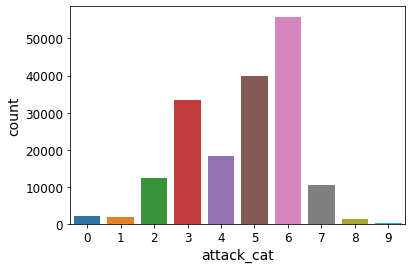

In [146]:
sns.countplot(y_train[target])
plt.show()

In [147]:
y_train= pd.get_dummies(y_train[target])
y_test = test_data.loc[:, ['attack_cat']]
print(x_train.shape, y_train.shape)

(175243, 41) (175243, 10)


In [148]:
y_test = pd.get_dummies(y_test[target])

print(x_test.shape, y_test.shape)

(82326, 41) (82326, 10)


- #### Most correlated features are :

#### spkts, sbytes, sloss, dpkts, dbytes, dloss, sinpkt, is_sm_ips_ports, swin, dwin, tcprtt, synack, ct_srv_src, ct_srv_dst, ct_dst_src_ltm, ct_src_dport_ltm, ct_dst_sport_ltm, is_ftp_login ct_ftp_cmd

In [149]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto') 

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train, validation_data=(x_test,y_test), callbacks=[monitor, model_checkpoint], verbose=2, epochs=100)  

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/100

Epoch 00001: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 4s - loss: 0.6205 - accuracy: 0.7623 - val_loss: 0.6967 - val_accuracy: 0.6959
Epoch 2/100

Epoch 00002: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 4s - loss: 0.5507 - accuracy: 0.7854 - val_loss: 0.7512 - val_accuracy: 0.6979
Epoch 3/100

Epoch 00003: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 4s - loss: 0.5343 - accuracy: 0.7910 - val_loss: 0.7710 - val_accuracy: 0.6617
Epoch 4/100

Epoch 00004: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 4s - loss: 0.5224 - accuracy: 0.7952 - val_loss: 0.7328 - val_accuracy: 0.6805
Epoch 5/100

Epoch 00005: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 4s - loss: 0.5158 - accuracy: 0.7968 - val_loss: 0.7730 - val_accuracy: 0.6668
Epoch 6/100

Epoch 00006: saving model to /Users/moksh/CSUS/CSC21

In [150]:
pred = model.predict(x_test)
print(pred[0])

[3.96085874e-04 3.91620488e-05 1.13576865e-02 3.88594680e-02
 6.80480957e-01 6.48034550e-03 2.09338188e-01 6.30585491e-05
 5.18160351e-02 1.16906362e-03]


In [151]:
pred = np.argmax(pred,axis=1) # raw probabilities to choose class (highest probability)
print(pred)

[4 4 4 ... 6 6 4]


In [152]:
y_test = np.argmax(y_test.values, axis = 1)
print(y_test)

[6 6 6 ... 6 6 6]


In [153]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       677
           1       0.20      0.01      0.01       583
           2       0.38      0.17      0.24      4089
           3       0.58      0.80      0.67     11131
           4       0.18      0.61      0.28      6061
           5       0.99      0.74      0.85     18871
           6       0.93      0.69      0.80     36997
           7       0.74      0.69      0.71      3495
           8       0.48      0.03      0.06       378
           9       0.43      0.07      0.12        44

    accuracy                           0.67     82326
   macro avg       0.49      0.38      0.37     82326
weighted avg       0.79      0.67      0.71     82326



In [154]:
def confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[    0     0    81   538     0     0    58     0     0     0]
 [    0     4    84   465    24     0     2     4     0     0]
 [    0    12   710  2990   229     4   102    42     0     0]
 [   16     3   665  8863   833     2   355   391     2     1]
 [    0     0   225  1136  3668     0   890   142     0     0]
 [    0     0     7   491  3970 13901   493     5     1     3]
 [  177     0     8   316 10524    58 25689   216     9     0]
 [    0     0    70   363   620    19     7  2415     1     0]
 [    0     1     0    36   244     6    10    69    12     0]
 [    0     0     0    28    10     0     2     1     0     3]]
Plotting confusion matrix


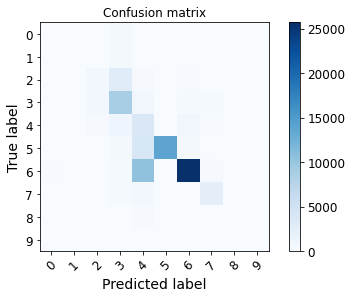

In [155]:
confusion_matrix = metrics.confusion_matrix(y_test, pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1, 2, 3, 4, 5, 6 ,7 ,8, 9])
plt.show()

## Top features


In [156]:
import pandas as pd
import sys, os, time, warnings


import seaborn as sns
import pandas as pd

train_data = pd.read_csv("UNSW_NB15_training-set.csv", index_col='id')
test_data = pd.read_csv("UNSW_NB15_testing-set.csv", index_col='id')

In [157]:
train_data_copy=train_data
test_data_copy=test_data

In [158]:
discrete_vars=['dur','spkts','dpkts','sbytes','dbytes','sttl','dttl','sloss','dloss','swin',
               'smean','dmean','trans_depth','response_body_len','ct_srv_src','ct_state_ttl',
               'ct_dst_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','is_ftp_login','ct_ftp_cmd',
               'ct_flw_http_mthd','ct_src_ltm','ct_srv_dst','is_sm_ips_ports']
continuous_vars=['rate','sload','dload','sinpkt','dinpkt', 'sjit','djit','synack','ackdat']
categorical_vars=['proto','state','attack_cat''stcpb','dtcpb', 'tcprtt']
dep_var=['label']

In [159]:
most_occured = ['tcp', 'udp', 'unas']
def encoding_categoricals(column):
    if column in most_occured:
        return column
    else:
        return "other"

In [160]:
train_data['proto'] = train_data['proto'].apply(encoding_categoricals)

test_data['proto'] = test_data['proto'].apply(encoding_categoricals)

In [161]:
d = {'INT':'INT', 'FIN':'FIN', 'CON':'CON', 'REQ':'REQ', 'RST':'RST', 'ACC':'OTHER', 'CLO':'OTHER','PAR':'OTHER', 'URN':'OTHER', 'no':'OTHER'}
test_data['state'] = test_data['state'].map(lambda s: d[s])

In [162]:
most_occured = ['INT', 'FIN', 'CON', 'REQ']

train_data = train_data[train_data['state'].isin(most_occured)]

test_data = test_data[test_data['state'].isin(most_occured)]

In [163]:
def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name, x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

In [164]:
encode_text_dummy(train_data,"proto")  
encode_text_dummy(train_data,"state")

encode_text_dummy(test_data,"proto")  
encode_text_dummy(test_data,"state")

In [165]:
corr_matrix = train_data.loc[:, ['label'] + continuous_vars].corr(method='pearson')
corr_matrix['label'].sort_values(ascending=False)
corr_matrix

,label,rate,sload,dload,sinpkt,dinpkt,sjit,djit,synack,ackdat
label,1.000000,0.337980,0.182804,-0.394145,-0.176246,-0.022936,-0.006478,-0.060998,0.058697,0.097729
rate,0.337980,1.000000,0.602417,-0.153145,-0.075769,-0.051551,-0.063241,-0.085844,-0.279167,-0.289993
sload,0.182804,0.602417,1.000000,-0.106348,-0.048768,-0.034845,-0.042355,-0.058044,-0.188666,-0.195973
dload,-0.394145,-0.153145,-0.106348,1.000000,-0.037661,-0.024329,-0.029395,-0.032986,-0.125133,-0.131290
sinpkt,-0.176246,-0.075769,-0.048768,-0.037661,1.000000,0.095750,0.048104,0.010495,-0.052384,-0.055013
dinpkt,-0.022936,-0.051551,-0.034845,-0.024329,0.095750,1.000000,0.674203,0.304709,0.089955,0.085649
sjit,-0.006478,-0.063241,-0.042355,-0.029395,0.048104,0.674203,1.000000,0.467709,0.132376,0.128446
djit,-0.060998,-0.085844,-0.058044,-0.032986,0.010495,0.304709,0.467709,1.000000,0.077399,0.080356
synack,0.058697,-0.279167,-0.188666,-0.125133,-0.052384,0.089955,0.132376,0.077399,1.000000,0.788922
ackdat,0.097729,-0.289993,-0.195973,-0.131290,-0.055013,0.085649,0.128446,0.080356,0.788922,1.000000


In [166]:
corr_matrix = train_data.loc[:, ['label'] + discrete_vars].corr(method='pearson')
corr_matrix['label'].sort_values(ascending=False)

label                1.000000
sttl                 0.693542
ct_state_ttl         0.577402
ct_dst_sport_ltm     0.357060
ct_dst_src_ltm       0.304564
ct_src_ltm           0.238332
ct_dst_ltm           0.230034
ct_srv_src           0.229704
ct_srv_dst           0.228689
dttl                 0.094898
dur                  0.036454
sbytes               0.018507
ct_flw_http_mthd     0.015613
trans_depth          0.010691
sloss               -0.000736
smean               -0.011134
ct_ftp_cmd          -0.011140
is_ftp_login        -0.011140
response_body_len   -0.021399
spkts               -0.052339
dbytes              -0.076982
dloss               -0.094813
dpkts               -0.118769
is_sm_ips_ports     -0.184865
swin                -0.333439
dmean               -0.342227
Name: label, dtype: float64

In [167]:
corr_matrix = corr_matrix[0:10]

In [168]:
corr_matrix

,label,dur,spkts,dpkts,sbytes,dbytes,sttl,dttl,sloss,dloss,...,ct_state_ttl,ct_dst_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
label,1.000000,0.036454,-0.052339,-0.118769,0.018507,-0.076982,0.693542,0.094898,-0.000736,-0.094813,...,0.577402,0.230034,0.357060,0.304564,-0.011140,-0.011140,0.015613,0.238332,0.228689,-0.184865
dur,0.036454,1.000000,0.254543,0.181298,0.199650,0.144261,0.012038,0.044126,0.198506,0.143088,...,0.186840,-0.086466,-0.093879,-0.101790,0.020683,0.020683,0.024811,-0.081007,-0.115370,0.035425
spkts,-0.052339,0.254543,1.000000,0.390083,0.963775,0.206653,-0.102789,0.068139,0.971057,0.207847,...,-0.086218,-0.060174,-0.072511,-0.077513,0.009954,0.009954,0.006099,-0.061563,-0.069547,-0.017772
dpkts,-0.118769,0.181298,0.390083,1.000000,0.188450,0.971913,-0.192585,0.053826,0.204862,0.978643,...,-0.150204,-0.071907,-0.094318,-0.094051,0.013482,0.013482,0.047988,-0.075193,-0.078306,-0.021775
sbytes,0.018507,0.199650,0.963775,0.188450,1.000000,0.009930,-0.020909,0.062906,0.996108,0.006812,...,-0.011999,-0.026630,-0.027277,-0.032015,-0.004511,-0.004511,-0.002172,-0.027444,-0.034500,-0.006363
dbytes,-0.076982,0.144261,0.206653,0.971913,0.009930,1.000000,-0.135512,0.023547,0.017373,0.996504,...,-0.090069,-0.042635,-0.056937,-0.054612,-0.010467,-0.010467,0.051415,-0.045599,-0.044509,-0.013154
sttl,0.693542,0.012038,-0.102789,-0.192585,-0.020909,-0.135512,1.000000,-0.032822,-0.044728,-0.162629,...,0.673158,0.271352,0.380171,0.404176,-0.124148,-0.124148,-0.112889,0.273242,0.340495,-0.220434
dttl,0.094898,0.044126,0.068139,0.053826,0.062906,0.023547,-0.032822,1.000000,0.075060,0.035464,...,-0.262671,-0.381724,-0.389548,-0.403554,0.107200,0.107200,0.223697,-0.365457,-0.431290,-0.091157
sloss,-0.000736,0.198506,0.971057,0.204862,0.996108,0.017373,-0.044728,0.075060,1.000000,0.017981,...,-0.036624,-0.036936,-0.041112,-0.045813,0.005695,0.005695,-0.002036,-0.038763,-0.045407,-0.009489
dloss,-0.094813,0.143088,0.207847,0.978643,0.006812,0.996504,-0.162629,0.035464,0.017981,1.000000,...,-0.114855,-0.054541,-0.072243,-0.070887,0.007755,0.007755,0.048880,-0.057420,-0.058587,-0.016677


In [169]:
correlation_list= train_data_copy[train_data_copy.columns[:]].corr()['label']

correlation_list1 = correlation_list.sort_values(ascending = False)
correlation_list1 = correlation_list1[0:10]
correlation_list1 = [col for col in correlation_list1.index]

In [170]:
correlation_list1

['label',
 'sttl',
 'ct_state_ttl',
 'ct_dst_sport_ltm',
 'rate',
 'ct_src_dport_ltm',
 'ct_dst_src_ltm',
 'ct_src_ltm',
 'ct_dst_ltm',
 'ct_srv_src']

In [171]:
correlation_list2 = correlation_list[10:]


In [172]:
correlation_list2 = [col for col in correlation_list2.index]


In [173]:
train_data_copy = train_data_copy.drop(correlation_list2, axis = 1)
test_data_copy= test_data_copy.drop(correlation_list2, axis = 1)


In [174]:
train_data.drop(['service','attack_cat'], axis=1, inplace=True)
test_data.drop(['service','attack_cat'], axis=1, inplace=True)

In [175]:
x_train = train_data.drop(['label'], axis = 1)
y_train= train_data.loc[:, ['label']]

x_test= test_data.drop(['label'], axis = 1)
y_test= test_data.loc[:, ['label']]


In [176]:
x_train = x_train.astype('float')
x_test = x_test.astype('float')

In [177]:
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd

In [178]:
for col in x_train.columns:
        encode_numeric_zscore(x_train,col)

for col in x_test.columns:
        encode_numeric_zscore(x_test,col)
target = 'label'
y_train = pd.get_dummies(y_train[target])
y_test = test_data.loc[:, ['label']]
y_test = pd.get_dummies(y_test[target])

In [179]:
import io
import requests
import os
import h5py
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_path = '/Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5'

model = Sequential()

#Tuning Hyperparameters to achieve best model and to improve performance
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(y_train.shape[1],activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto') 

model_checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_loss',verbose=1,save_best_only=False,save_weights_only=False, mode='auto') # save best model

model.fit(x_train, y_train, validation_data=(x_test,y_test), callbacks=[monitor, model_checkpoint], verbose=2, epochs=10)  

model.load_weights(checkpoint_path) # load weights from best model
model.save(checkpoint_path)

Epoch 1/10

Epoch 00001: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 4s - loss: 0.1392 - accuracy: 0.9357 - val_loss: 0.3283 - val_accuracy: 0.8297
Epoch 2/10

Epoch 00002: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 4s - loss: 0.1252 - accuracy: 0.9397 - val_loss: 0.3853 - val_accuracy: 0.8196
Epoch 3/10

Epoch 00003: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 4s - loss: 0.1221 - accuracy: 0.9412 - val_loss: 0.2993 - val_accuracy: 0.8285
Epoch 4/10

Epoch 00004: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 4s - loss: 0.1200 - accuracy: 0.9421 - val_loss: 0.3141 - val_accuracy: 0.8281
Epoch 5/10

Epoch 00005: saving model to /Users/moksh/CSUS/CSC215/Project_1/model_weight5.hdf5
5477/5477 - 4s - loss: 0.1174 - accuracy: 0.9433 - val_loss: 0.3359 - val_accuracy: 0.8232
Epoch 6/10

Epoch 00006: saving model to /Users/moksh/CSUS/CSC215/Proj

In [180]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1) # raw probabilities to choose class (highest probability)
print(y_pred)
y_test = np.argmax(y_test.values, axis = 1)
print(y_test)

[1 1 1 ... 0 0 1]
[0 0 0 ... 0 0 0]


In [181]:
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.71      0.82     36997
           1       0.81      0.97      0.88     45329

    accuracy                           0.86     82326
   macro avg       0.88      0.84      0.85     82326
weighted avg       0.87      0.86      0.85     82326



In [182]:
from sklearn.metrics import roc_curve,auc
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

[[26385 10612]
 [ 1324 44005]]
Plotting confusion matrix


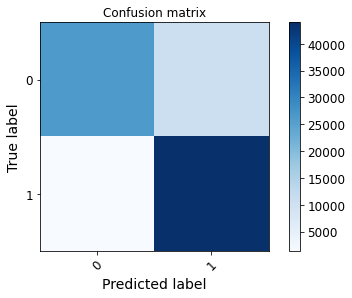

In [183]:
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(confusion_matrix)
classification = metrics.classification_report(y_test, y_pred)
print('Plotting confusion matrix')

plt.figure()
plot_confusion_matrix(confusion_matrix, [0, 1])
plt.show()

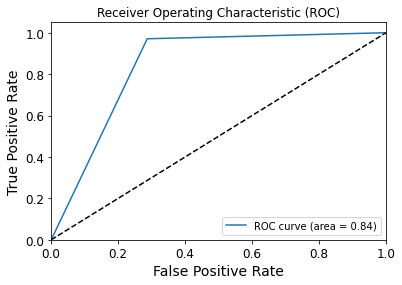

In [184]:
plot_roc(y_pred, y_test)